<a href="https://colab.research.google.com/github/AstridXiomara/LSTM/blob/main/Multivariate_LSTM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate LSTM Model

## Librerias

In [1]:
!pip install --quiet optuna

     |████████████████████████████████| 348 kB 4.3 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 209 kB 50.8 MB/s 
     |████████████████████████████████| 78 kB 4.6 MB/s 
     |████████████████████████████████| 112 kB 41.1 MB/s 
     |████████████████████████████████| 147 kB 61.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 


In [2]:
import numpy as np
import pandas as pd

# univariate lstm example
#import keras
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
from datetime import datetime
import math
import optuna

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import mean_squared_error


## Data

In [3]:
np.random.seed(123)

In [4]:
Constrains = pd.read_excel("Well Data Var.xlsx", sheet_name="Hoja1")
Constrains

,Pwf,Pwf2,Pwf3,Pwf4,Qw
0,3391,3286,3545,3541,1438
1,3516,3574,3297,3362,1170
2,3918,3468,3340,3085,1722
3,3972,3516,3396,3978,1671
4,3711,3546,3807,3773,548
5,3911,3758,3019,3709,967
6,3536,3678,3840,3530,818
7,3409,3275,3389,3831,1057
8,3114,3592,3436,3084,1138
9,3827,3809,3371,3766,1595


In [5]:
Production=pd.read_csv("Hoja1_results.csv", header=0, index_col=0)
Production

,0,1,2,3,4,5,6,7
0,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
1,701.721854,416.201622,946.422570,412.233996,0.007646,0.007878,0.018913,0.003323
2,675.849776,376.334852,823.549166,383.456721,0.008396,0.009304,0.021928,0.004275
3,665.542561,356.393406,766.447214,367.399296,0.008550,0.009895,0.022844,0.004791
4,658.972904,343.600407,733.636846,355.941247,0.008567,0.010208,0.023145,0.005146
...,...,...,...,...,...,...,...,...
356,104.020717,72.356329,124.298593,180.799889,442.098991,65.154675,425.571438,0.931140
357,103.619260,71.999299,123.654413,180.136330,441.037166,65.006586,425.178772,1.009742
358,103.230162,71.657921,123.033685,179.477546,440.088982,64.880222,424.825421,1.092265
359,102.852404,71.330698,122.434750,178.825734,439.239938,64.771734,424.502688,1.178638


In [6]:
Constrains2 = Constrains.copy(deep = True)
Constrains2['new_index'] = Constrains.index *15
Constrains2.set_index('new_index', inplace= True)


In [7]:
Production.drop(index=360,inplace=True)
Production.rename(index={359:360},inplace=True)

In [8]:
Production

,0,1,2,3,4,5,6,7
0,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
1,701.721854,416.201622,946.422570,412.233996,0.007646,0.007878,0.018913,0.003323
2,675.849776,376.334852,823.549166,383.456721,0.008396,0.009304,0.021928,0.004275
3,665.542561,356.393406,766.447214,367.399296,0.008550,0.009895,0.022844,0.004791
4,658.972904,343.600407,733.636846,355.941247,0.008567,0.010208,0.023145,0.005146
...,...,...,...,...,...,...,...,...
355,104.435622,72.730721,124.966025,181.465348,443.291818,65.329399,426.005989,0.856507
356,104.020717,72.356329,124.298593,180.799889,442.098991,65.154675,425.571438,0.931140
357,103.619260,71.999299,123.654413,180.136330,441.037166,65.006586,425.178772,1.009742
358,103.230162,71.657921,123.033685,179.477546,440.088982,64.880222,424.825421,1.092265


In [9]:
join = Constrains2.join(Production, how = 'inner')
join


,Pwf,Pwf2,Pwf3,Pwf4,Qw,0,1,2,3,4,5,6,7
0,3391,3286,3545,3541,1438,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
15,3516,3574,3297,3362,1170,570.918516,231.898717,797.543919,346.285673,0.007434,0.007929,0.028257,0.007277
30,3918,3468,3340,3085,1722,360.469808,260.930138,580.721992,351.937395,0.005550,0.008295,0.027352,0.010564
45,3972,3516,3396,3978,1671,447.214593,251.667978,604.774850,122.392607,0.003150,0.007467,0.024358,0.004080
60,3711,3546,3807,3773,548,511.215305,255.674263,384.373333,269.430474,24.197117,0.006692,0.126044,0.004123
75,3911,3758,3019,3709,967,224.908669,151.202454,788.577439,217.234170,83.892531,0.005232,89.064064,0.005616
90,3536,3678,3840,3530,818,310.883287,181.023070,69.158209,225.738601,164.319419,0.005928,20.331166,0.007227
105,3409,3275,3389,3831,1057,270.826391,256.772330,449.389245,119.694587,183.232529,0.009657,202.657079,0.004780
120,3114,3592,3436,3084,1138,308.929255,117.996943,289.325809,309.369328,259.187062,0.006541,168.237800,0.011050
135,3827,3809,3371,3766,1595,100.603427,95.272161,297.409239,70.416139,103.008928,0.014014,225.644583,0.003922


In [10]:
data=join.to_numpy()
data

array([[3.39100000e+03, 3.28600000e+03, 3.54500000e+03, 3.54100000e+03,
        1.43800000e+03, 1.00972536e+03, 6.77975588e+02, 1.68337424e+03,
        5.71400305e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.51600000e+03, 3.57400000e+03, 3.29700000e+03, 3.36200000e+03,
        1.17000000e+03, 5.70918516e+02, 2.31898717e+02, 7.97543919e+02,
        3.46285673e+02, 7.43352080e-03, 7.92927979e-03, 2.82565193e-02,
        7.27737804e-03],
       [3.91800000e+03, 3.46800000e+03, 3.34000000e+03, 3.08500000e+03,
        1.72200000e+03, 3.60469808e+02, 2.60930138e+02, 5.80721992e+02,
        3.51937395e+02, 5.55001916e-03, 8.29522195e-03, 2.73524215e-02,
        1.05637160e-02],
       [3.97200000e+03, 3.51600000e+03, 3.39600000e+03, 3.97800000e+03,
        1.67100000e+03, 4.47214593e+02, 2.51667978e+02, 6.04774850e+02,
        1.22392607e+02, 3.14953806e-03, 7.46684480e-03, 2.43576345e-02,
        4.08043344e-03],
       [3.71100000e+03, 3.54600000e+

In [11]:
bhp_1 = data[:,0]
bhp_2 = data[:,1]
bhp_3 = data[:,2]
bhp_4 = data[:,3]
Qw    = data[:,4]
oil_1 = data[:,5]
oil_2 = data[:,6]
oil_3 = data[:,7]
oil_4 = data[:,8]
wat_1 = data[:,9]
wat_2 = data[:,10]
wat_3 = data[:,11]
wat_4 = data[:,12]

In [12]:
# convert to [rows, columns] structure
BHP1 = bhp_1.reshape((len(bhp_1),1))
BHP2 = bhp_2.reshape((len(bhp_2),1))
BHP3 = bhp_3.reshape((len(bhp_3),1))
BHP4 = bhp_4.reshape((len(bhp_4),1))

QW  = Qw.reshape((len(Qw),1))

qo1 = oil_1.reshape((len(oil_1),1))
qo2 = oil_2.reshape((len(oil_2),1))
qo3 = oil_3.reshape((len(oil_3),1))
qo4 = oil_4.reshape((len(oil_4),1))

qw1 = wat_1.reshape((len(wat_1),1))
qw2 = wat_2.reshape((len(wat_2),1))
qw3 = wat_3.reshape((len(wat_3),1))
qw4 = wat_4.reshape((len(wat_4),1))

# horizontally stack columns
well_1_oil = hstack((BHP1, QW, qo1))
well_2_oil = hstack((BHP2, QW, qo2))
well_3_oil = hstack((BHP3, QW, qo3))
well_4_oil = hstack((BHP4, QW, qo4))

well_1_wat = hstack((BHP1, QW, qw1))
well_2_wat = hstack((BHP2, QW, qw2))
well_3_wat = hstack((BHP3, QW, qw3))
well_4_wat = hstack((BHP4, QW, qw4))

In [13]:
data_interes = well_1_wat

array([[3.39100000e+03, 1.43800000e+03, 0.00000000e+00],
       [3.51600000e+03, 1.17000000e+03, 7.43352080e-03],
       [3.91800000e+03, 1.72200000e+03, 5.55001916e-03],
       [3.97200000e+03, 1.67100000e+03, 3.14953806e-03],
       [3.71100000e+03, 5.48000000e+02, 2.41971169e+01],
       [3.91100000e+03, 9.67000000e+02, 8.38925306e+01],
       [3.53600000e+03, 8.18000000e+02, 1.64319419e+02],
       [3.40900000e+03, 1.05700000e+03, 1.83232529e+02],
       [3.11400000e+03, 1.13800000e+03, 2.59187062e+02],
       [3.82700000e+03, 1.59500000e+03, 1.03008928e+02],
       [3.43500000e+03, 7.96000000e+02, 3.42127274e+02],
       [3.02400000e+03, 1.40300000e+03, 3.68307460e+02],
       [3.88500000e+03, 1.83400000e+03, 1.23944853e+02],
       [3.87400000e+03, 1.12300000e+03, 3.36876567e+02],
       [3.85100000e+03, 1.66200000e+03, 2.86850767e+02],
       [3.80500000e+03, 1.99300000e+03, 3.79182132e+02],
       [3.97100000e+03, 7.50000000e+02, 3.83368918e+02],
       [3.30500000e+03, 1.52000

In [14]:
import csv
with open('test.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(data_interes)


In [15]:
my_data = np.genfromtxt('test.csv', delimiter=',')

In [16]:
print(type(my_data))
my_data

<class 'numpy.ndarray'>


array([[3.39100000e+03, 1.43800000e+03, 0.00000000e+00],
       [3.51600000e+03, 1.17000000e+03, 7.43352080e-03],
       [3.91800000e+03, 1.72200000e+03, 5.55001916e-03],
       [3.97200000e+03, 1.67100000e+03, 3.14953806e-03],
       [3.71100000e+03, 5.48000000e+02, 2.41971169e+01],
       [3.91100000e+03, 9.67000000e+02, 8.38925306e+01],
       [3.53600000e+03, 8.18000000e+02, 1.64319419e+02],
       [3.40900000e+03, 1.05700000e+03, 1.83232529e+02],
       [3.11400000e+03, 1.13800000e+03, 2.59187062e+02],
       [3.82700000e+03, 1.59500000e+03, 1.03008928e+02],
       [3.43500000e+03, 7.96000000e+02, 3.42127274e+02],
       [3.02400000e+03, 1.40300000e+03, 3.68307460e+02],
       [3.88500000e+03, 1.83400000e+03, 1.23944853e+02],
       [3.87400000e+03, 1.12300000e+03, 3.36876567e+02],
       [3.85100000e+03, 1.66200000e+03, 2.86850767e+02],
       [3.80500000e+03, 1.99300000e+03, 3.79182132e+02],
       [3.97100000e+03, 7.50000000e+02, 3.83368918e+02],
       [3.30500000e+03, 1.52000

## Funciones

### Preparar Data

In [17]:
# Divide el dataset en subsets train/test.
def train_test_split(data, n_test):
    return data[:-n_test,:], data[-n_test:,:]

In [18]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

### Vanilla, Stacked, Bidirectional, Encoder

In [19]:
# Modelo

def modelo(data, parametros):
  
  LSTM_model, nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test=parametros
  
  train, test = train_test_split(data, n_test)
  x_train, y_train = split_sequences(train, n_steps_in,n_steps_out)
  x_test, y_test = split_sequences(test, n_steps_in,n_steps_out)
  
  #modelo
  if LSTM_model=="Vanilla":
    # define model
    model = Sequential()
    #Number of LSTM in hidden layer=50
    model.add(LSTM(nodes, activation=activacion, input_shape=(n_steps_in, n_features)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)
  elif LSTM_model=="Stacked":
    # define model
    model = Sequential()
    model.add(LSTM(nodes, activation=activacion, return_sequences=True, input_shape=(n_steps_in, n_features)))
    model.add(LSTM(nodes, activation=activacion))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)
  elif LSTM_model=="Bidirectional":
    # define model
    model = Sequential()
    model.add(Bidirectional(LSTM(nodes, activation=activacion), input_shape=(n_steps_in, n_features)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)
  elif LSTM_model=="Encoder-Decoder":
    model = Sequential()
    model.add(LSTM(nodes, activation=activacion, input_shape=(n_steps_in, n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(nodes, activation=activacion, return_sequences=True))
    model.add(TimeDistributed(Dense(n_steps_out)))
    model.compile(optimizer=optimizador, loss=perdidas)
  # fit model
  model.fit(x_train, y_train, epochs=epocas, verbose=0)

  #Prediccion
  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    # demonstrate prediction
    x_input = array(x_test[i,:,:])
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat[i] = model.predict(x_input, verbose=0)

  RMSE = math.sqrt(mean_squared_error(y_test, yhat))
  return y_test,yhat, RMSE

### CNN LSTM

In [20]:
#CNN
def CNN_LSTM(data, parametros):

  LSTM_model, nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test, n_seq, n_steps, filtros, kernelsize =parametros
  
  train, test = train_test_split(data, n_test)
  x_train, y_train = split_sequences(train, n_steps_in, n_steps_out)
  x_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
  
  X = x_train.reshape((x_train.shape[0], n_seq, n_steps, n_features))

  # define model
  model = Sequential()
  model.add(TimeDistributed(Conv1D(filters=filtros, kernel_size=kernelsize, activation=activacion), input_shape=(None, n_steps, n_features)))
  model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
  model.add(TimeDistributed(Flatten()))
  if LSTM_model=="Vanilla":
    # define model
    #Number of LSTM in hidden layer=50
    model.add(LSTM(nodes, activation=activacion))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)
  elif LSTM_model=="Stacked":
    # define model
    model.add(LSTM(nodes, activation=activacion, return_sequences=True))
    model.add(LSTM(nodes, activation=activacion))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)
  elif LSTM_model=="Bidirectional":
    # define model
    model.add(Bidirectional(LSTM(nodes, activation=activacion)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer=optimizador, loss=perdidas)

  # fit model
  model.fit(X, y_train, epochs=epocas, verbose=0)

  X2 = x_test.reshape((x_test.shape[0], n_seq, n_steps, n_features))
  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    x_input = array(X2[i,:,:])
    x_input = x_input.reshape((1, n_seq, n_steps, n_features))
    yhat[i] = model.predict(x_input, verbose=0)
  
  RMSE=math.sqrt(mean_squared_error(y_test, yhat))
  #RMSE = math.sqrt(mean_squared_error( y_test, yhat))
  return (y_test, yhat, RMSE)


### Conv LSTM

In [24]:
def Conv_LSTM(data, parametros):
  
  nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test, n_seq, n_steps, filtros=parametros
  
  train, test = train_test_split(data, n_test)
  x_train, y_train = split_sequences(train, n_steps_in, n_steps_out)
  x_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
  
  X = x_train.reshape((x_train.shape[0], n_seq, 1, n_steps, n_features))

  # define model
  model = Sequential()
  model.add(ConvLSTM2D(filters=filtros, kernel_size=(1,2), activation=activacion, input_shape=(n_seq, 1, n_steps, n_features)))
  model.add(Flatten())
  model.add(Dense(n_steps_out))
  model.compile(optimizer=optimizador, loss=perdidas)

  # fit model
  model.fit(X, y_train, epochs=epocas, verbose=0)

  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    x_input = array(x_test[i,:,:])
    x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
    yhat[i] = model.predict(x_input, verbose=0)
  
  RMSE=math.sqrt(mean_squared_error(y_test, yhat))
  return (y_test, yhat, RMSE)


### Optuna

In [45]:
##OPTUNA

#Vanilla, stacked, bidirectional, encoder
def optunaObjective(trial):
  data = np.genfromtxt('test.csv', delimiter=',')
  #LSTM_model, nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test=parametros
  LSTM_model = trial.suggest_categorical('LSTM_model', ['Vanilla','Bidirectional','Stacked', "Encoder-Decoder"])
  nodes = trial.suggest_int("nodes", 50, 500)
  activacion = trial.suggest_categorical('activacion', ['relu', 'linear', 'sigmoid', 'tanh'])
  n_steps_in = trial.suggest_int("n_steps_in", 2, 8)
  #n_test = trial.suggest_int("n_test", 2, 10)
  epocas = trial.suggest_int("epocas", 50, 500)

  parametros = [LSTM_model, nodes, activacion, n_steps_in, 2, 1, 'adam', 'mse', epocas, 10]
     
  y_test,y,RMSE1 = modelo(data,parametros)
  
  return RMSE1

#CNN
def optunaObjective1(trial):
  data = np.genfromtxt('test.csv', delimiter=',')
  #LSTM_model, nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test, n_seq, n_steps, filtros, kernelsize =parametros
  LSTM_model = trial.suggest_categorical('LSTM_model', ['Vanilla','Bidirectional','Stacked'])
  nodes = trial.suggest_int("nodes", 50, 500)
  activacion = trial.suggest_categorical('activacion', ['relu', 'linear', 'sigmoid', 'tanh'])
  n_steps_in = trial.suggest_int("n_steps_in", 4, 8, 2)
  #n_test = trial.suggest_int("n_test", 2, 10)
  epocas = trial.suggest_int("epocas", 50, 500)
  filtros = trial.suggest_int("filtros", 10, 200)
  
  n_steps=int(n_steps_in/2)
  parametros = [LSTM_model, nodes, activacion, n_steps_in, 2, 1, 'adam', 'mse', epocas, 10, 2, n_steps, filtros, 1]
  y_test,y,RMSE1 = CNN_LSTM(data,parametros)
  
  return RMSE1

#Conv
def optunaObjective2(trial):
  data = np.genfromtxt('test.csv', delimiter=',')
  #nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas, n_test, n_seq, n_steps, filtros
  nodes = trial.suggest_int("nodes", 50, 500)
  activacion = trial.suggest_categorical('activacion', ['relu', 'linear', 'sigmoid', 'tanh'])
  n_steps_in = trial.suggest_int("n_steps_in", 4, 8, 2)
  #n_test = trial.suggest_int("n_test", 2, 10)
  epocas = trial.suggest_int("epocas", 50, 500)
  filtros = trial.suggest_int("filtros", 10, 200)
  
  n_steps=int(n_steps_in/2)
  parametros = [nodes, activacion, n_steps_in, 2, 1, 'adam', 'mse', epocas, 10, 2, n_steps, filtros]
  y_test,y,RMSE1 = Conv_LSTM(data,parametros)
  
  return RMSE1

## Corrida

### General

In [47]:
#LSTM_model, nodes, activacion, n_steps_in, n_features, n_steps_out, optimizador, perdidas, epocas,n_test
parametros1="Vanilla",          50, "relu", 4, 2, 1, "adam", "mse", 200,10
parametros2="Stacked",          50, "relu", 4, 2, 1, "adam", "mse", 200,10
parametros3="Bidirectional",    50, "relu", 4, 2, 1, "adam", "mse", 200,10
parametros4="Encoder-Decoder",  50, "relu", 4, 2, 1, "adam", "mse", 200,10
parametros5= "Vanilla",         50, "relu", 4, 2, 1, "adam", "mse", 200,10, 2, 2, 64, 1
parametros6= "Stacked",         50, "relu", 4, 2, 1, "adam", "mse", 200,10, 2, 2, 64, 1
parametros7= "Bidirectional",   50, "relu", 4, 2, 1, "adam", "mse", 200,10, 2, 2, 64, 1
parametros8=                    50, "relu", 4, 2, 1, "adam", "mse", 200,10, 2, 2, 64

y_test, y1, RMSE1=modelo(data_interes, parametros1)
y_test, y2, RMSE2=modelo(data_interes, parametros2)
y_test, y3, RMSE3=modelo(data_interes, parametros3)
y_test, y4, RMSE4=modelo(data_interes, parametros4)

y_test, y5, RMSE5=CNN_LSTM(data_interes, parametros5)
y_test, y6, RMSE6=CNN_LSTM(data_interes, parametros6)
y_test, y7, RMSE7=CNN_LSTM(data_interes, parametros7)

y_test, y8, RMSE8=Conv_LSTM(data_interes, parametros8)

y_test, y1, RMSE1, y2, RMSE2, y3, RMSE3, y4, RMSE4, y5, RMSE5, y6, RMSE6, y7, RMSE7, y8, RMSE8


(array([[438.35628286],
        [683.60142657],
        [721.07200712],
        [544.64730193],
        [360.33671812],
        [449.43686083],
        [439.23993754]]),
 array([258.64956665, 245.33857727, 203.94232178, 149.61407471,
        227.05966187, 203.23556519, 199.82275391]),
 334.56616482492404,
 array([188.44935608, 182.14611816,  58.66507721, 170.47592163,
        179.61050415, 184.81506348,  61.54920959]),
 403.2076754932446,
 array([410.50271606, 493.92184448, 564.09204102, 355.80050659,
        210.4773407 , 248.17277527, 194.80455017]),
 177.18985405010912,
 array([183.06428528, 178.33309937, 161.35946655, 165.19226074,
        172.13314819, 160.09902954, 186.48924255]),
 370.4734848851214,
 array([192.86578369, 173.89419556, 190.12030029, 164.91012573,
        195.55804443, 167.55056763, 199.18019104]),
 360.6378595102718,
 array([196.17556763, 158.00416565, 188.44902039, 173.68969727,
        172.29656982, 299.17770386, 182.63142395]),
 354.5592053815236,
 array([193.

n_seq = 2
n_steps = 2
XCNN = X.reshape((X.shape[0], n_seq, n_steps, n_features))

### Plot

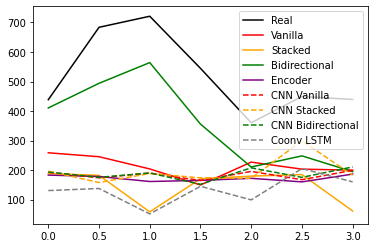

In [48]:
xx=np.linspace(0, 3, y_test.shape[0])

plt.plot(xx, y_test, color="black", linestyle='solid',  label='Real')
plt.plot(xx, y1,     color="red",   linestyle='solid',  label='Vanilla')
plt.plot(xx, y2,     color="orange",linestyle='solid',  label='Stacked')
plt.plot(xx, y3,     color="green", linestyle='solid',  label='Bidirectional')
plt.plot(xx, y4,     color="purple",linestyle='solid',  label='Encoder')
plt.plot(xx, y5,     color="red",   linestyle='dashed', label='CNN Vanilla')
plt.plot(xx, y6,     color="orange",linestyle='dashed', label='CNN Stacked')
plt.plot(xx, y7,     color="green", linestyle='dashed', label='CNN Bidirectional')
plt.plot(xx, y8,     color="grey",  linestyle='dashed', label='Coonv LSTM')
plt.legend();

### Optuna

In [34]:
## OPTUNA 1 GENERAL

study = optuna.create_study(direction="minimize")
study.optimize(optunaObjective, n_trials=40)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

    

[I 2022-08-31 14:30:01,465] A new study created in memory with name: no-name-d0fed753-8a86-455b-8c3a-5f4300f96d86
[I 2022-08-31 14:30:10,728] Trial 0 finished with value: 238.2044171545655 and parameters: {'LSTM_model': 'Vanilla', 'nodes': 357, 'activacion': 'relu', 'n_steps_in': 8, 'epocas': 171}. Best is trial 0 with value: 238.2044171545655.
[I 2022-08-31 14:30:17,650] Trial 1 finished with value: 494.3847353694168 and parameters: {'LSTM_model': 'Vanilla', 'nodes': 365, 'activacion': 'sigmoid', 'n_steps_in': 2, 'epocas': 288}. Best is trial 0 with value: 238.2044171545655.
[I 2022-08-31 14:30:28,917] Trial 2 finished with value: 512.0036851582421 and parameters: {'LSTM_model': 'Stacked', 'nodes': 158, 'activacion': 'tanh', 'n_steps_in': 5, 'epocas': 143}. Best is trial 0 with value: 238.2044171545655.
[I 2022-08-31 14:30:51,038] Trial 3 finished with value: 397.8594699866897 and parameters: {'LSTM_model': 'Encoder-Decoder', 'nodes': 438, 'activacion': 'tanh', 'n_steps_in': 2, 'epoca

Number of finished trials: 40
Best trial:
  Value: 87.9957439799184
  Params: 
    LSTM_model: Vanilla
    nodes: 422
    activacion: relu
    n_steps_in: 8
    epocas: 174


In [43]:
# OPTUNA 2 CNN

studyCNN = optuna.create_study(direction="minimize")
studyCNN.optimize(optunaObjective1, n_trials=40)

print("Number of finished trials: {}".format(len(studyCNN.trials)))

print("Best trial:")
trial1 = studyCNN.best_trial

print("  Value: {}".format(trial1.value))

print("  Params: ")
for key, value in trial1.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-31 15:06:25,088] A new study created in memory with name: no-name-57924cbd-e73e-4ff6-ad79-9a7827abbabc
[I 2022-08-31 15:06:33,018] Trial 0 finished with value: 429.4695794140929 and parameters: {'LSTM_model': 'Vanilla', 'nodes': 358, 'activacion': 'tanh', 'n_steps_in': 4, 'epocas': 271, 'filtros': 16}. Best is trial 0 with value: 429.4695794140929.
[I 2022-08-31 15:06:43,193] Trial 1 finished with value: 344.5594779699067 and parameters: {'LSTM_model': 'Bidirectional', 'nodes': 259, 'activacion': 'tanh', 'n_steps_in': 8, 'epocas': 101, 'filtros': 188}. Best is trial 1 with value: 344.5594779699067.
[I 2022-08-31 15:07:04,291] Trial 2 finished with value: 205.13595799953023 and parameters: {'LSTM_model': 'Bidirectional', 'nodes': 343, 'activacion': 'tanh', 'n_steps_in': 8, 'epocas': 404, 'filtros': 145}. Best is trial 2 with value: 205.13595799953023.
[I 2022-08-31 15:07:17,042] Trial 3 finished with value: 207.74289555977495 and parameters: {'LSTM_model': 'Stacked', 'nodes':

Number of finished trials: 40
Best trial:
  Value: 105.59253653059432
  Params: 
    LSTM_model: Vanilla
    nodes: 147
    activacion: relu
    n_steps_in: 8
    epocas: 232
    filtros: 196


In [46]:
# OPTUNA 3 CONV

studyConv = optuna.create_study(direction="minimize")
studyConv.optimize(optunaObjective2, n_trials=40)

print("Number of finished trials: {}".format(len(studyConv.trials)))

print("Best trial:")
trial2 = studyConv.best_trial

print("  Value: {}".format(trial2.value))

print("  Params: ")
for key, value in trial2.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-31 15:46:11,539] A new study created in memory with name: no-name-c5eaec39-1f87-4ced-b999-fe02274b7381
[I 2022-08-31 15:46:20,141] Trial 0 finished with value: 304.71926074831447 and parameters: {'nodes': 459, 'activacion': 'linear', 'n_steps_in': 6, 'epocas': 207, 'filtros': 83}. Best is trial 0 with value: 304.71926074831447.
[I 2022-08-31 15:46:27,458] Trial 1 finished with value: 526.6977963591686 and parameters: {'nodes': 91, 'activacion': 'tanh', 'n_steps_in': 4, 'epocas': 434, 'filtros': 61}. Best is trial 0 with value: 304.71926074831447.
[I 2022-08-31 15:46:32,646] Trial 2 finished with value: 370.1142532091717 and parameters: {'nodes': 60, 'activacion': 'linear', 'n_steps_in': 4, 'epocas': 110, 'filtros': 145}. Best is trial 0 with value: 304.71926074831447.
[I 2022-08-31 15:46:39,376] Trial 3 finished with value: 171.54362987998846 and parameters: {'nodes': 81, 'activacion': 'relu', 'n_steps_in': 8, 'epocas': 248, 'filtros': 107}. Best is trial 3 with value: 171.5

Number of finished trials: 40
Best trial:
  Value: 127.63371801966763
  Params: 
    nodes: 179
    activacion: relu
    n_steps_in: 8
    epocas: 327
    filtros: 27


In [50]:
##Optimos
parametros1="Vanilla",          422, "relu", 8, 2, 1, "adam", "mse", 174,10
y_test, y1, RMSE1=modelo(data_interes, parametros1)

parametros5= "Vanilla",         147, "relu", 8, 2, 1, "adam", "mse", 232,10, 2, 4, 196, 1
y_test, y5, RMSE5=CNN_LSTM(data_interes, parametros5)

parametros8=                    179, "relu", 8, 2, 1, "adam", "mse", 327,10, 2, 4, 27
y_test, y8, RMSE8=Conv_LSTM(data_interes, parametros8)

y_test, y1, RMSE1, y5, RMSE5, y8, RMSE8

(array([[360.33671812],
        [449.43686083],
        [439.23993754]]),
 array([240.9841156 , 343.73071289, 315.10583496]),
 116.65920289995104,
 array([343.39752197, 274.79748535, 286.87133789]),
 134.16661034337238,
 array([226.03279114, 253.41392517, 284.56988525]),
 163.6921512899749)

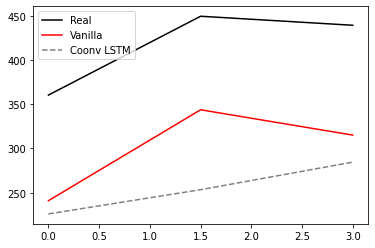

In [51]:
xx=np.linspace(0, 3, y_test.shape[0])
plt.plot(xx, y_test, color="black", linestyle='solid',  label='Real')
plt.plot(xx, y1,     color="red",   linestyle='solid',  label='Vanilla')
plt.plot(xx, y8,     color="grey",  linestyle='dashed', label='Coonv LSTM')
plt.legend();